In [11]:
from epyt import epanet
import matplotlib.pyplot as plt

In [2]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [3]:
print(f'Default:{d.getNodeNameID()}')

Default:['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']


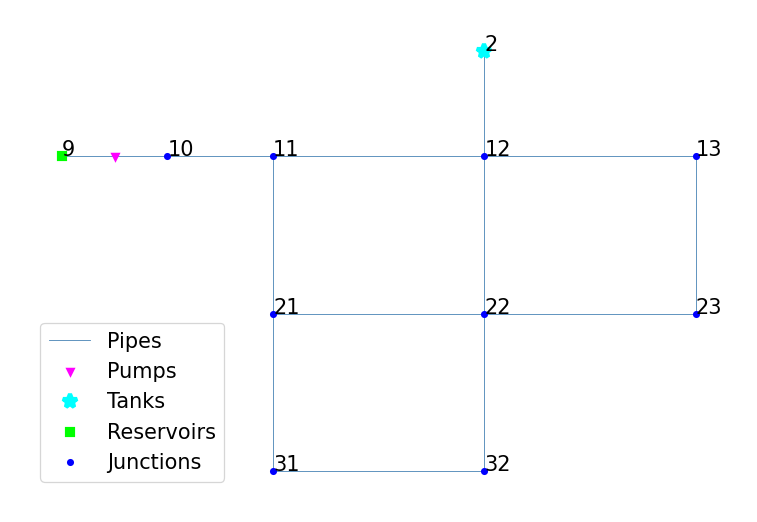

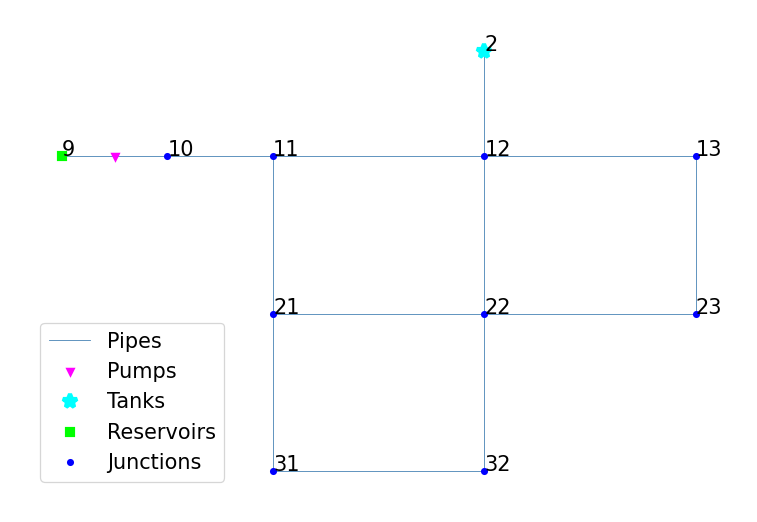

In [5]:
d.plot(nodesID=True)

In [6]:
junction_prefix='J'
reservoir_prefix='R'
tankPrefix='T'


In [8]:
for i in d.getNodeJunctionIndex():
    d.setNodeNameID(i,junction_prefix+'-'+str(i))
for j in d.getNodeReservoirIndex():
    d.setNodeNameID(j,reservoir_prefix+'-'+str(i))
for k in d.getNodeTankIndex():
    d.setNodeNameID(k,tankPrefix+'-'+str(i))

In [9]:
d.getNodeNameID()

['J-1', 'J-2', 'J-3', 'J-4', 'J-5', 'J-6', 'J-7', 'J-8', 'J-9', 'R-9', 'T-9']

In [10]:
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [4]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [5]:
help(d.addNodeJunction)

Help on method addNodeJunction in module epyt.epanet:

addNodeJunction(juncID, *argv) method of epyt.epanet.epanet instance
    Adds new junction
    
    Returns the index of the new junction.
    
    The following data can be set(optional):
      1. Coordinates
      2. Elevation
      3. Primary base demand
      4. ID name of the demand's time pattern
    
    Example 1: Adds a new junction with the default coordinates
    (i.e. [0, 0]).
    
    >>> junctionID = 'newJunction_1'
    >>> junctionIndex = d.addNodeJunction(junctionID)
    >>> d.plot()
    
    Example 2: Adds a new junction with coordinates [X, Y] = [20, 10].
    
    >>> junctionID = 'newJunction_2'
    >>> junctionCoords = [20, 10]
    >>> junctionIndex = d.addNodeJunction(junctionID, junctionCoords)
    >>> d.plot(highlightnode=junctionIndex)
    
    Example 3: Adds a new junction with coordinates [X, Y] = [20, 20]
    and elevation = 500.
    
    >>> junctionID = 'newJunction_3'
    >>> junctionCoords = [20, 20

In [6]:
junction_id='NewJunction'
x_coordinate=50
y_coordinate=50
elevation=50
demand=50

d.addNodeJunction(junction_id,[x_coordinate,y_coordinate],elevation,demand)

10

In [7]:
d.saveInputFile('Net1J.inp')

In [8]:
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [9]:
en=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



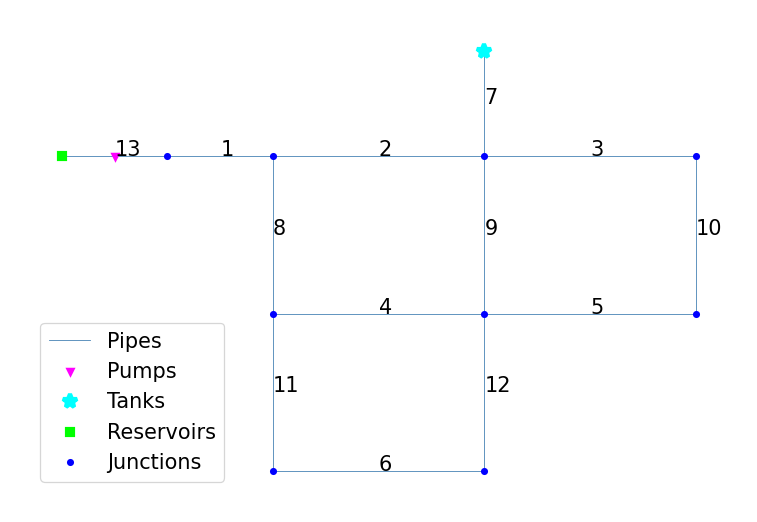

In [17]:
d.plot(linksindex=True)
plt.show()

In [18]:
def pipe_cost(length,diameter):
    return (length*diameter)*5
def pump_cost(capacity):
    return capacity*0.5

In [20]:
no_links=en.getLinkCount()
no_nodes=en.getNodeCount()

In [33]:
original_cost_pipe=0
original_cost_pump=0
for link_index in en.getLinkIndex():
    link_type=en.getLinkType(link_index)
    if link_type=="PIPE":
        length=en.getLinkLength(link_index)
        diameter=en.getLinkDiameter(link_index)
        original_cost_pipe+=pipe_cost(length,diameter)
    elif link_type=="PUMP":
        capacity=en.getLinkFlows(link_index)
        original_cost_pump+=pump_cost(capacity)

In [34]:
network_cost=original_cost_pipe+original_cost_pump

In [35]:
network_cost

3500100.0

In [51]:
en.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [42]:
d=epanet('Net1r.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1r.inp loaded successfully.



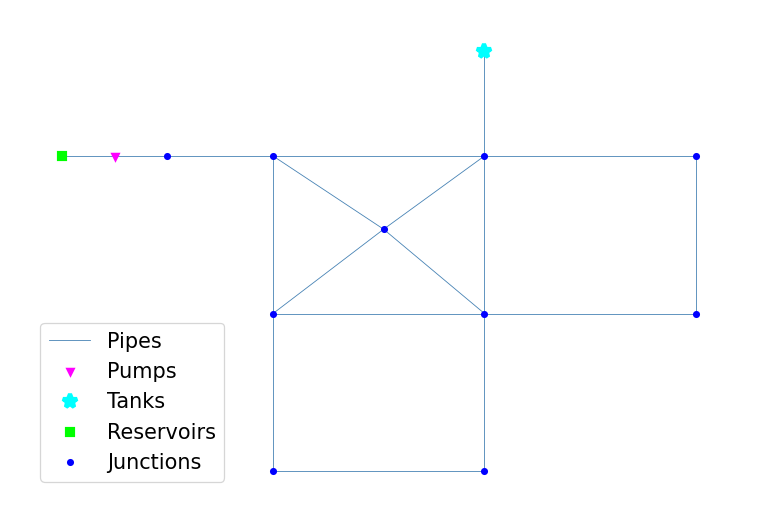

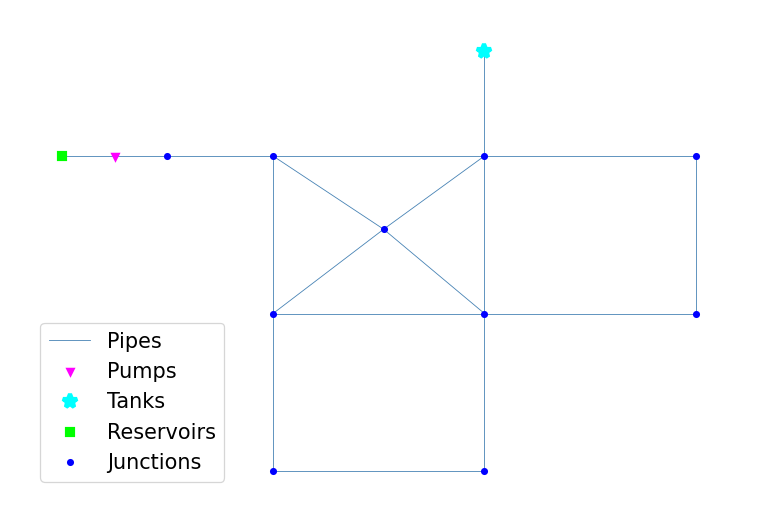

In [43]:
d.plot()

In [45]:
def pipe_cost(length,diameter):
    return (length*diameter)*5
def pump_cost(capacity):
    return capacity*0.5

In [46]:
no_links=d.getLinkCount()
no_nodes=d.getNodeCount()

In [48]:
no_links=d.getLinkCount()
no_nodes=d.getNodeCount()
original_cost_pipe=0
original_cost_pump=0
for link_index in d.getLinkIndex():
    link_type=d.getLinkType(link_index)
    if link_type=="PIPE":
        length=d.getLinkLength(link_index)
        diameter=d.getLinkDiameter(link_index)
        original_cost_pipe+=pipe_cost(length,diameter)
    elif link_type=="PUMP":
        capacity=d.getLinkFlows(link_index)
        original_cost_pump+=pump_cost(capacity)

In [49]:
network_cost=original_cost_pipe+original_cost_pump

In [50]:
network_cost

3740100.0

In [64]:
en=epanet('Net3.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net3.inp loaded successfully.



In [65]:
def identifyCriticalLinks(en,threshold=100):
    critical_links=[]
    for link_index in d.getLinkIndex():
        flow=en.getLinkFlows(link_index)
        if flow > threshold:
            critical_links.append(link_index)
    return critical_links

In [66]:
identifyCriticalLinks(en,30)

[]